## 此样例是将摄氏度与华氏度进行转换，使用tensorflow2.0建立一个含有隐藏层的神经网络，隐藏层没有激活函数
* 转换公式：
> f = c * 1.8 + 32

In [15]:
import tensorflow as tf
import numpy as np

给定数据

In [16]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

## 创建模型
创建一个多层的模型，此模型有两个隐藏层（使用多个不带激活函数的隐藏层等效于不适用隐藏层）
### 建立三层神经元
使用``tf.keras.layers.Dense``建立网络层，此方法的两个参数为：
* ``input_shape=[1]`` 表示此层输入的维度。
* ``units=1`` 表示此层中神经元的数量，应该与下一层的``input_shape``相同

In [35]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

### 将层集成（堆叠）到模型Model中
将定义好的不同层依次加入``tf.keras.Sequential``中

In [36]:
model = tf.keras.Sequential([l0, l1, l2])

也可以先建立``tf.keras.Sequential``，再将``layers``加入到``Sequential``中

In [30]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
# model.add(tf.keras.layers.Dense(units=4))
# model.add(tf.keras.layers.Dense(units=1))

### 使用loss以及optimizer编译模型
使用``model.complie``进行编译，传入``loss``以及``oprimizer``参数

In [37]:
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(0.1))

### 训练模型
使用``model.fit``训练模型
第一个参数是输入，第二个参数是想要得到的输出，``epochs``参数表示要进行多少次训练，``verbose``参数控制输出

In [38]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Finished training the model')

Finished training the model


``model.fit``返回的是一个``tensorflow.python.keras.callbacks.History``对象，我们可以用这个对象得到每训练一个epoch后loss的变化情况

In [33]:
type(history)

tensorflow.python.keras.callbacks.History

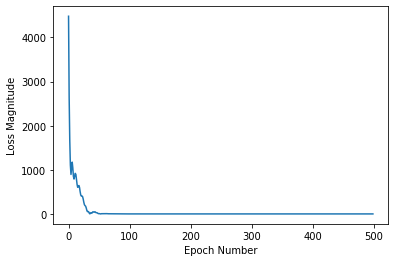

In [39]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

## 使用模型进行预测
使用``model.predict``进行预测，由于网络的输入维度是1，因此输入的数组的维度应该是(?, 1)

In [21]:
x_pre = np.array([100, 150, 200]).reshape(3, 1)
print(model.predict(x_pre))

[[211.7474 ]
 [301.64484]
 [391.5423 ]]


## 查看不同层参数

In [22]:
print('These are the layer variables: {}'.format(l0.get_weights()))

These are the layer variables: [array([[0.44166887, 0.74088794, 0.18476322, 0.17058235]], dtype=float32), array([ 3.6649573,  3.948055 , -2.942927 ,  2.998963 ], dtype=float32)]


In [23]:
print('These are the layer variables: {}'.format(l1.get_weights()))

These are the layer variables: [array([[-0.54540294,  0.13718396,  0.72851074, -0.6015388 ],
       [-0.24728823,  0.29627135,  0.22430244, -1.1130002 ],
       [ 0.25203848, -1.7068754 , -0.36372513,  0.29913244],
       [ 0.34799173, -0.54695594,  1.1112198 , -1.3071889 ]],
      dtype=float32), array([-0.36598516,  2.3215256 ,  2.6916187 , -3.8060253 ], dtype=float32)]


In [24]:
print('These are the layer variables: {}'.format(l2.get_weights()))

These are the layer variables: [array([[-0.13943616],
       [ 0.5231781 ],
       [ 0.6051605 ],
       [-1.1538324 ]], dtype=float32), array([3.67987], dtype=float32)]
